# Klassificering av hjärt- och kärlsjukdom

### Features:

- Age | Objective Feature | age | int (days)  
- Height | Objective Feature | height | int (cm) |  
- Weight | Objective Feature | weight | float (kg) |  
- Gender | Objective Feature | gender | categorical code |  
- Systolic blood pressure | Examination Feature | ap_hi | int |  
- Diastolic blood pressure | Examination Feature | ap_lo | int |  
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |  
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |  
- Smoking | Subjective Feature | smoke | binary |  
- Alcohol intake | Subjective Feature | alco | binary |  
- Physical activity | Subjective Feature | active | binary |  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardio_train.csv", delimiter=";", index_col=0)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1.1 EDA

In [3]:
# a) 
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?  
- Antal positiva: 34979  
- Antal negativa: 35021  

In [4]:
# b)
antal_patienter = len(df)

andel_normala_kolesterol = (df["cholesterol"] == 1).sum() / antal_patienter
print(andel_normala_kolesterol)

andel_över_normala_kolesterol = (df["cholesterol"] == 2).sum() / antal_patienter
print(andel_över_normala_kolesterol)

andel_långt_över_normala_kolesterol = ((df["cholesterol"] == 3).sum() / antal_patienter)
print(andel_långt_över_normala_kolesterol)



0.7483571428571428
0.1364142857142857
0.11522857142857143


b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden?
- Andel normala: ca 0.748 (74.8%)
- Andel över normala: ca 0.136 (13.6%)
- Andel långt över normala: ca 0.115 (11.5%)

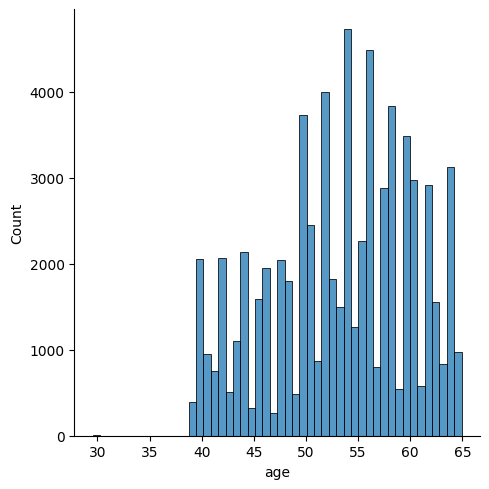

In [5]:
# c)
df["age"] = df["age"]/365.25
sns.displot(x="age", bins=50, kind="hist", data=df)

In [6]:
yngst = df["age"].min()
äldst = df["age"].max()
medelålder = df["age"].mean()

print(yngst)
print(äldst)
print(medelålder)

29.56331279945243
64.92265571526352
53.3028495942114


c) Hur ser åldersfördelningen ut?
- Åldersspridningen är väldigt splittrad men majoriteten av patienterna ligger mellan ca 40 och 65 år
- Yngsta patienten är ca 30 år gammal (kan dock vara fel, t.ex att de slog in en 2:a istället för 3:a (ca 40 år))
- Äldsta patienten är ca 65 år gammal
- Medelåldern i undersökningen är ca 53 år

In [7]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# d)
rökare = (df["smoke"] == 1).sum()
andel_rökare = rökare/antal_patienter

print(andel_rökare)

0.08812857142857143


d) Hur stor andel röker?
- Andelen rökare är ca 0.088 (8,8%)

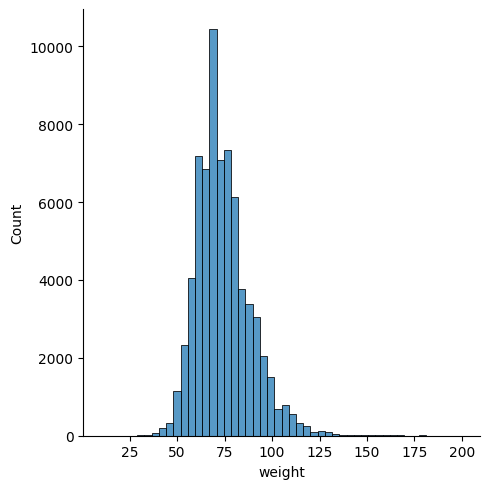

In [9]:
# e)
sns.displot(x="weight", bins=50, kind="hist", data=df)

In [10]:
lägst_vikt = df["weight"].min()
högst_vikt = df["weight"].max()
medel_vikt = df["weight"].mean()
vikt_std = df["weight"].std()

print(lägst_vikt)
print(högst_vikt)
print(medel_vikt)
print(vikt_std)

10.0
200.0
74.20569
14.39575667851138


e) Hur ser viktfördelningen ut?
- Eftersom det är högst osannolikt att någon i det här åldersspannet skulle väga 10 kg kommer jag utgå ifrån att det inte stämmer. Det finns en del patienter runt 40 kg, vilket känns lågt men ändå rimligt (eftersom det är relativt många), så jag kommer sätta lägsta vikten som 40kg.
- Den som väger mest väger 200 kg
- Viktspannet ligger då mellan ca 40-200 kg
- Medelvikten ligger på ca 74 kg
- Viktfördelningen följer normalfördelningen med en liten förskjutning åt höger.
- Standardavvikelsen är ca 14 kg

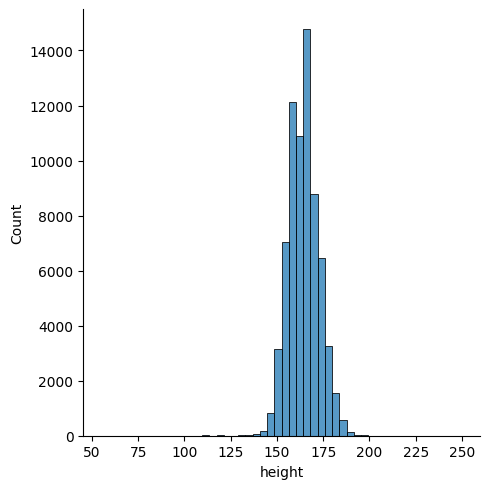

In [11]:
# f)
sns.displot(x="height", bins=50, kind="hist", data=df)

In [12]:
kortast = df["height"].min()
längst = df["height"].max()
medellängd = df["height"].mean()
längd_std = df["height"].std()

print(kortast)
print(längst)
print(medellängd)
print(längd_std)

55
250
164.35922857142856
8.210126364538038


f) Hur ser längdfördelningen ut?
- Vi ser en normalfördelning för längden
- Medellängden är ca 164 cm med en standardavvikelse på ca 8 cm
- Både lägsta (55 cm) och högsta (250 cm) är orimliga men flera ser ut att vara runt 140 cm, vilket också känns väldigt kort, men kan stämma. Det är också någon/några runt 2m, vilket kan stämma. Jag säger därför att spannet är mellan ca 140 - 200 cm

In [13]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
# g)
# Eftersom det inte står i datasetet huruvida gender 1 eller 2 är man/kvinna så gör jag en jämförelse för längd 
# Jag kommer utgå ifrån att den med högst genomsnittlig längd är för män och den andra siffran är kvinnor.

df_kön_1 = df[df["gender"] == 1]
df_kön_2 = df[df["gender"] == 2]

kön_1_medellängd = df_kön_1["height"].mean()
kön_2_medellängd = df_kön_2["height"].mean()

print(kön_1_medellängd)
print(kön_2_medellängd)

161.35561168460356
169.94789538210054


Eftersom kön 2 har en medellängd på drygt 8 cm längre än kön 1 så utgår jag ifrån att:
- Kön 1 = Kvinnor
- Kön 2 = Män

In [15]:
kvinnor = df_kön_1
män = df_kön_2

antal_kvinnor = len(kvinnor)
antal_sjuka_kvinnor = (kvinnor["cardio"] == 1).sum()
andel_sjuka_kvinnor = antal_sjuka_kvinnor/antal_kvinnor

antal_män = len(män)
antal_sjuka_män = (män["cardio"] == 1).sum()
andel_sjuka_män = antal_sjuka_män/antal_män

print(andel_sjuka_kvinnor)
print(andel_sjuka_män)

0.4967274324621129
0.5052308949734369


g) Hur stor andel kvinnor respektive män har hjärt-kärlsjukdom?
- Andelen kvinnor med hjärt-kärlsjukdom är ca 0.497 (49,7%)
- Andelen män med hjärt-kärlsjukdom är ca 0.505 (50,5%)

### EDA Sammanfattning

#### Hjärt-kärlsjukdomar
- Antal positiva: 34979  
- Antal negativa: 35021 
- Andel sjuka kvinnor: ca 49,7%
- Andel sjuka män: ca 50,5% 

#### Kolesterol
- Andel normala: ca 74.8%
- Andel över normala: ca 13.6%
- Andel långt över normala: ca 11.5%

#### Ålder
- Väldigt splittrat men majoriteten är mellan 40-65 år
- Medelålder: ca 53 år

#### Rökning
- Andel rökare: ca 8,8% rökare

#### Vikt
- Normalfördelning med förskjutning åt höger
- Medelvikt: ca 74kg med standardavvikelse ca 14kg

#### Längd
- Normalfördelning
- Medellängd: ca 164 cm med standardavvikelse ca 8 cm